# ANALISIS E INSIGHTS

Empezaremos la búsqueda de Insights dando respuesta a las preguntas semilla y es probable que en el proceso nos vayan surgiendo hallazgos interesantes que nos lleven a nuevas preguntas.

## SET UP

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sqlalchemy as sa

#Automcompletar rápido
%config IPCompleter.greedy=True

pd.options.display.max_columns = None

## CARGA DE DATOS

In [2]:
con = sa.create_engine('sqlite:///../../Datos_3/airbnb.db')

df = pd.read_sql('df_preparado', con = con)

df.head()

,level_0,index,id,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,calculated_host_listings_count,availability_365,description,host_is_superhost,accommodates,bedrooms,beds,number_of_reviews,review_scores_rating,review_scores_communication,review_scores_location,precio_m2,distrito,precio_total,ocupacion,bedrooms_disc,accommodates_disc,beds_disc,number_of_reviews_disc,m2,precio_compra,pdi_sol
0,0,0,6369,"Rooftop terrace room , ensuite bathroom",13660,Chamartín,Hispanoamérica,40.45724,-3.67688,Private room,60,1,2,180,Excellent connection with the AIRPORT and EXHI...,t,2,1.0,1.0,80,4.87,4.89,4.77,5098,Chamartín,60.0,50,01_Una,0-3,1,48-744,50,178430.0,5.032039
1,1,1,21853,Bright and airy room,83531,Latina,Cármenes,40.40381,-3.74130,Private room,31,4,2,364,We have a quiet and sunny room with a good vie...,f,1,1.0,1.0,33,4.58,4.82,4.21,2267,Latina,31.0,0,01_Una,0-3,1,5-48,50,79345.0,3.521406
2,2,2,23001,Apartmento Arganzuela- Madrid Rio,82175,Arganzuela,Legazpi,40.38840,-3.69511,Entire home/apt,50,15,5,222,"Apartamento de tres dormitorios dobles, gran s...",f,6,3.0,5.0,0,NaN,NaN,NaN,4085,Arganzuela,50.0,39,03_Tres,5-16,3-24,1-4,90,257355.0,3.226963
3,3,3,24805,Gran Via Studio Madrid,346366726,Centro,Universidad,40.42183,-3.70529,Entire home/apt,92,5,1,115,"Studio located 50 meters from Gran Via, next t...",f,3,1.0,1.0,12,4.92,5.00,5.00,4827,Centro,92.0,68,01_Una,0-3,1,5-48,50,168945.0,0.591065
4,4,4,26825,Single Room whith private Bathroom,114340,Arganzuela,Legazpi,40.38975,-3.69018,Private room,26,2,1,349,Nice and cozy roon for one person with a priva...,f,1,1.0,1.0,149,4.68,4.71,4.70,4085,Arganzuela,26.0,4,01_Una,0-3,1,48-744,50,142975.0,3.200942


## ANALISIS

### Analisis sobre el precio

**¿Cual es el precio medio? ¿y el rango de precios?¿Y por distritos?¿Y por barrios?**

**¿Cual es el ranking de distritos y barrios por precio medio de alquiler?**

In [3]:
df.precio_total.describe()

count    17367.000000
mean       149.106869
std        519.616893
min         20.000000
25%         44.000000
50%         70.000000
75%        112.000000
max      22400.000000
Name: precio_total, dtype: float64

Vemos que hay al menos un atípico por la parte de arriba que sesga la media, por tanto vamos a usar la mediana como medida de centralización más fiable.

In [4]:
df.precio_total.median()

70.0

In [5]:
df.groupby('distrito').precio_total.median().sort_values(ascending = False)

distrito
San Blas - Canillejas    90.0
Salamanca                89.0
Centro                   77.0
Chamartín                74.2
Chamberí                 70.0
Hortaleza                70.0
Retiro                   68.0
Tetuán                   65.5
Moncloa - Aravaca        63.0
Fuencarral - El Pardo    60.9
Arganzuela               58.0
Vicálvaro                50.3
Barajas                  50.0
Ciudad Lineal            50.0
Carabanchel              48.0
Villa de Vallecas        47.5
Latina                   46.2
Villaverde               42.0
Usera                    41.5
Moratalaz                40.0
Puente de Vallecas       40.0
Name: precio_total, dtype: float64

Nos llama la atención el dato de San Blas porque no es típicamente un distrito caro, vamos a verlo con más detalle a ver qué está pasando.

In [6]:
df.loc[df.distrito == 'San Blas - Canillejas'].sort_values('precio_total',ascending = False).head(10)

,level_0,index,id,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,calculated_host_listings_count,availability_365,description,host_is_superhost,accommodates,bedrooms,beds,number_of_reviews,review_scores_rating,review_scores_communication,review_scores_location,precio_m2,distrito,precio_total,ocupacion,bedrooms_disc,accommodates_disc,beds_disc,number_of_reviews_disc,m2,precio_compra,pdi_sol
9079,9079,9079,34600594,3 rooms near Wanda,38951538,San Blas - Canillejas,Arcos,40.42105,-3.61457,Private room,2800,1,2,0,3 rooms 15´walking from Wanda.,f,6,3.0,5.0,0,NaN,NaN,NaN,2591,San Blas - Canillejas,9800.0,100,03_Tres,5-16,3-24,1-4,90,163233.0,7.532233
9450,9450,9450,34826962,Pozos rooms,222068421,San Blas - Canillejas,Arcos,40.41927,-3.61555,Private room,3000,1,1,88,Cerca nos podemos encontrar un centro comercia...,f,4,2.0,3.0,0,NaN,NaN,NaN,2591,San Blas - Canillejas,6300.0,75,02_Dos,4,2,1-4,70,126959.0,7.439364
9971,9971,9971,35149419,CHALET FOR THE FINAL CHAMPIONS LEAGUE MADRID,143732655,San Blas - Canillejas,Canillejas,40.44937,-3.61633,Entire home/apt,6000,1,1,365,We are talking about one of the last villas fo...,f,6,4.0,5.0,0,NaN,NaN,NaN,2591,San Blas - Canillejas,6000.0,0,04_Cuatro o mas,5-16,3-24,1-4,120,217644.0,8.212429
9456,9456,9456,34833756,Wanda Champions Final,29628177,San Blas - Canillejas,Rosas,40.42622,-3.60502,Private room,2700,1,1,0,Somos una pareja joven educados y muy sociable...,f,5,2.0,3.0,0,NaN,NaN,NaN,2591,San Blas - Canillejas,5670.0,100,02_Dos,5-16,2,1-4,70,126959.0,8.391922
9665,9665,9665,34970236,Habitaciones cerca Wanda Metropolitano (Champi...,263474389,San Blas - Canillejas,Arcos,40.41920,-3.61229,Private room,800,1,1,88,"Se alquilan 5 habitaciones, cada una para 2 hu...",f,10,5.0,8.0,0,NaN,NaN,NaN,2591,San Blas - Canillejas,4480.0,75,04_Cuatro o mas,5-16,3-24,1-4,150,272055.0,7.714952
9536,9536,9536,34882596,2 rooms near wanda,38951538,San Blas - Canillejas,Arcos,40.41948,-3.61427,Private room,1500,1,2,363,2 rooms near Wanda stadium (20' walking) with ...,f,4,2.0,4.0,0,NaN,NaN,NaN,2591,San Blas - Canillejas,4200.0,0,02_Dos,4,3-24,1-4,70,126959.0,7.548577
8962,8962,8962,34522997,Beautiful Penthouse next to Wanda Metropolitano,260551569,San Blas - Canillejas,Canillejas,40.43686,-3.61093,Private room,2000,1,1,0,Wonderful penthouse in a lovely duplex next to...,f,4,1.0,3.0,0,NaN,NaN,NaN,2591,San Blas - Canillejas,4200.0,100,01_Una,4,2,1-4,50,90685.0,8.138310
9875,9875,9875,35091283,FINAL CHAMPIONS LEAGUE,264225539,San Blas - Canillejas,Rejas,40.44592,-3.58746,Private room,1000,1,1,180,"Desayuno, comida y cena incluida. Traslados al...",f,6,2.0,6.0,0,NaN,NaN,NaN,2591,San Blas - Canillejas,4200.0,50,02_Dos,5-16,3-24,1-4,70,126959.0,10.334061
9618,9618,9618,34933116,FINAL CHAMPIONS LEAGUE MADRID,263232278,San Blas - Canillejas,Simancas,40.43968,-3.61933,Private room,2000,2,1,365,Near (15 minutes walking) to WANDA STADIUM.<br...,f,5,3.0,3.0,0,NaN,NaN,NaN,2591,San Blas - Canillejas,4200.0,0,03_Tres,5-16,2,1-4,90,163233.0,7.557076
10185,10185,10185,35251141,Se alquila para final de la champion league,265376740,San Blas - Canillejas,Canillejas,40.44292,-3.60764,Entire home/apt,3000,1,1,365,None,f,1,2.0,4.0,0,NaN,NaN,NaN,2591,San Blas - Canillejas,3000.0,0,02_Dos,0-3,3-24,1-4,70,126959.0,8.610212


Vemos que son precios en el entorno de los 3.000 - 5.000 euros!

Al leer la descripción nos damos cuenta de todos estos precios están definidos por la final de la Champions League.

Lo cual es un insight interesante: 

**Insight 1: pueden existir inmuebles con un valor regular residual pero con alto valor en momentos puntuales por acontenicimientos deportivos o espectáculos**

Tal vez podría tener sentido generar un producto de alquiler que consista en alquilar de forma "normal" a un precio inferior al mercado con la condición de que el inquilino deje el piso libre para alquilarlo "turísticamente" en fechas señaladas.

En el resto no hay sorpresas, con distritos como Salamanca, Centro o Chanmartín a la cabeza.

Pero por ejemplo vemos que la diferencia de precio media entre Retiro y Tetuán es muy baja.

Esto nos lleva a comparar el precio medio por distrito con el precio medio de compra también por distrito.

In [7]:
temp = df.groupby('distrito')[['precio_total','precio_compra']].median()
temp

,precio_total,precio_compra
distrito,,
Arganzuela,58.0,142975.0
Barajas,50.0,119315.0
Carabanchel,48.0,74305.0
Centro,77.0,168945.0
Chamartín,74.2,178430.0
Chamberí,70.0,188335.0
Ciudad Lineal,50.0,102900.0
Fuencarral - El Pardo,60.9,124880.0
Hortaleza,70.0,135485.0


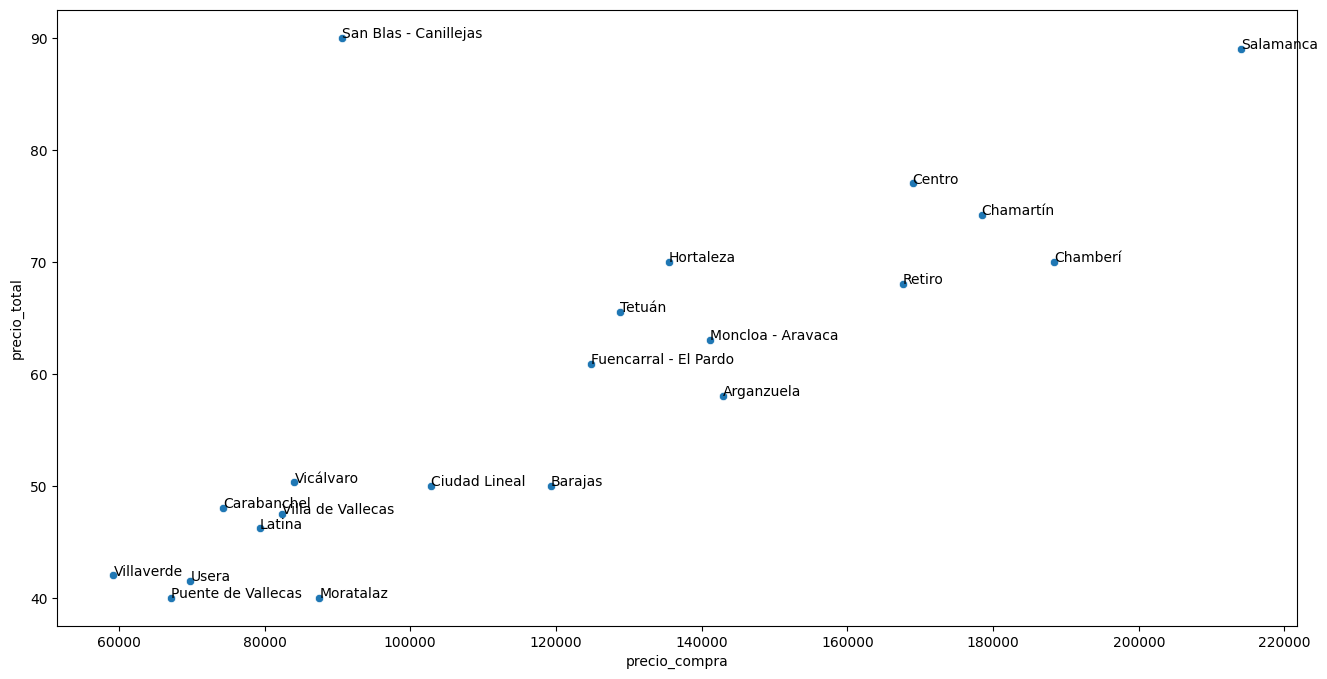

In [8]:
plt.figure(figsize = (16,8))
sns.scatterplot(data = temp, x = 'precio_compra', y = 'precio_total')
#Ponemos las etiquetas
for cada in range(0,temp.shape[0]):
    plt.text(temp.precio_compra.iloc[cada], temp.precio_total.iloc[cada], temp.index[cada])

Existe una clara correlación entre el precio de compra en cada distrito y el precio que podremos cobrar.

Claramente se perciben tres clusters de bajo-bajo, medio-medio y alto-alto.

Y la excepción de San Blas que ya sabemos por qué es.

Por tanto como era esperable no hay a priori ninguna "ganga" clara a este nivel.

Vamos a repetir el análisis a nivel de barrio a ver si identificamos algo.

In [9]:
temp = df.groupby('neighbourhood')[['precio_total','precio_compra']].median()
temp

,precio_total,precio_compra
neighbourhood,,
Abrantes,35.5,74305.0
Acacias,54.6,142975.0
Adelfas,54.0,201096.0
Aeropuerto,41.3,119315.0
Aguilas,47.0,79345.0
...,...,...
Valverde,62.5,124880.0
Ventas,42.0,102900.0
Vinateros,50.0,87500.0


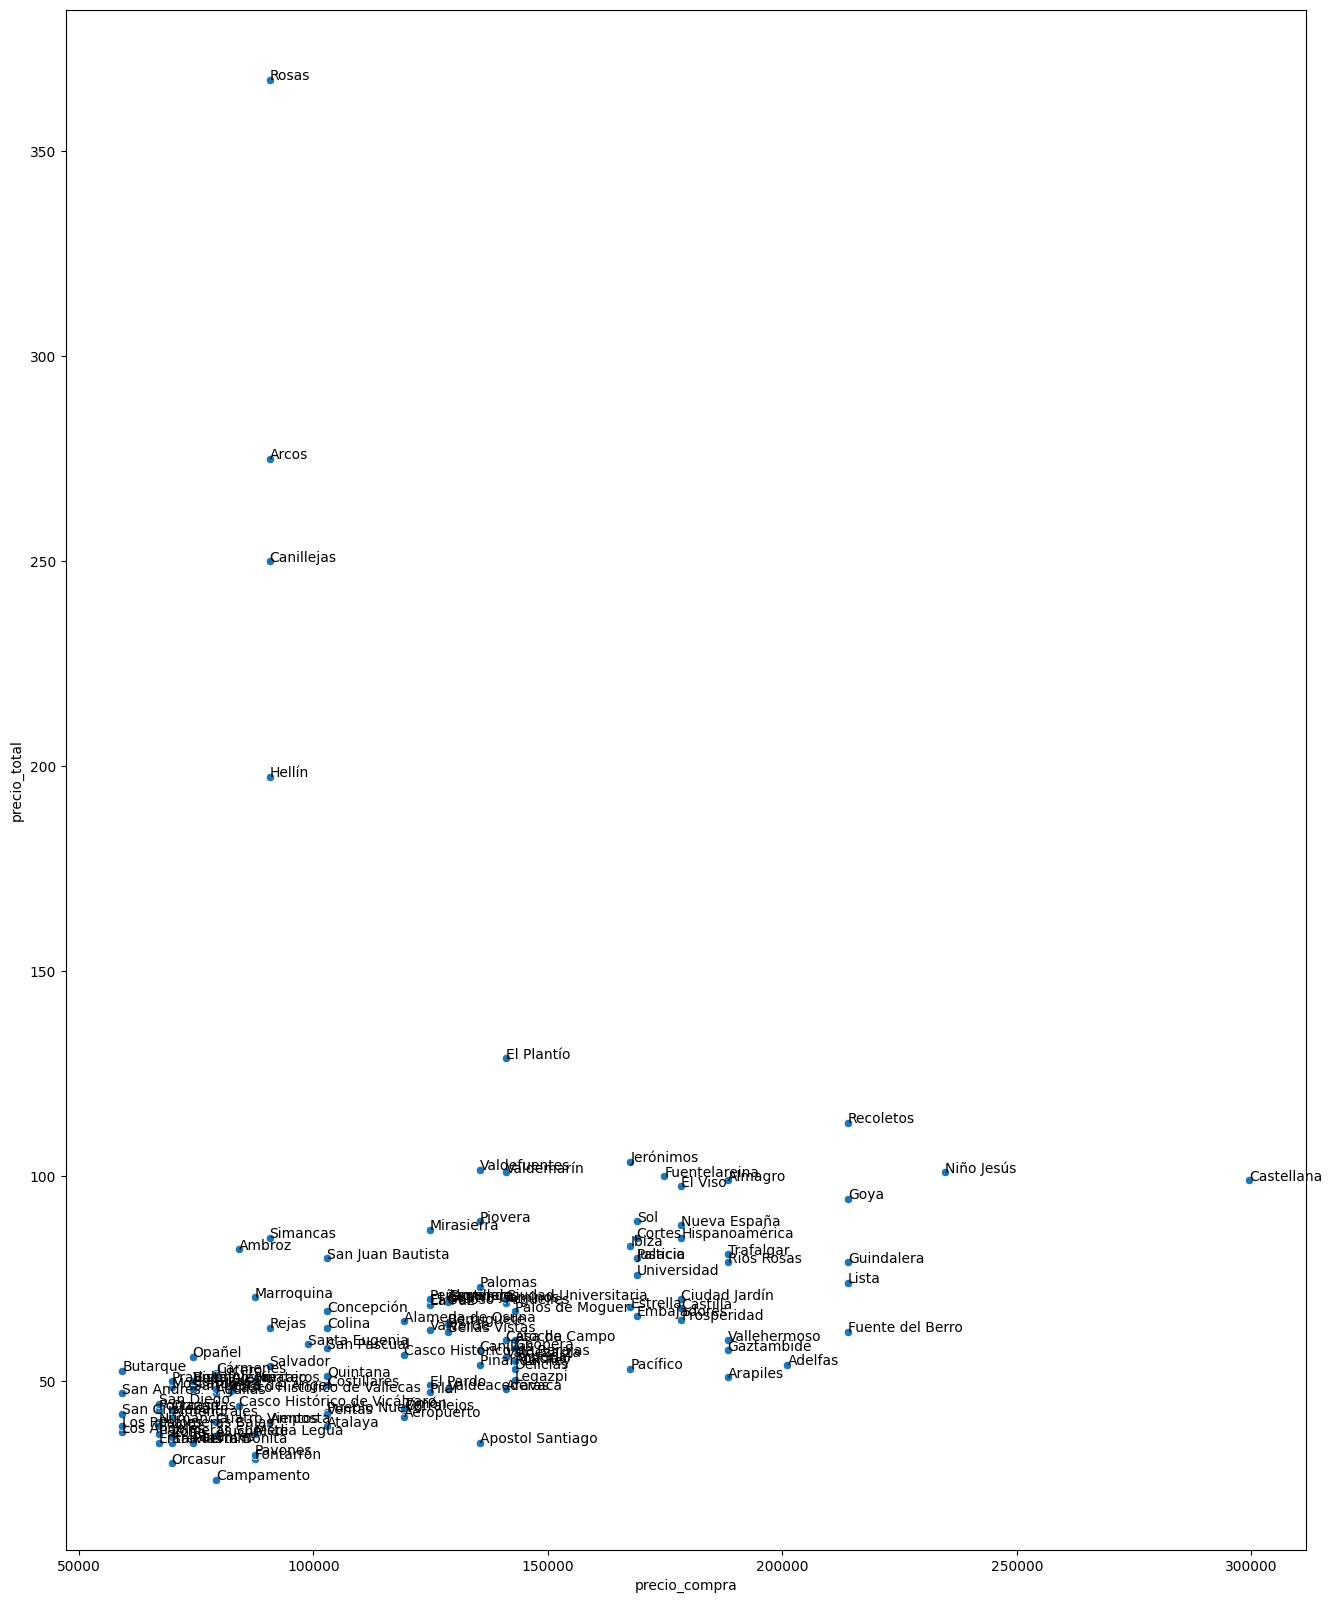

In [11]:
plt.figure(figsize = (16,20))
sns.scatterplot(data = temp, x = 'precio_compra', y = 'precio_total')
#Ponemos las etiquetas
for cada in range(0,temp.shape[0]):
    plt.text(temp.precio_compra.iloc[cada], temp.precio_total.iloc[cada], temp.index[cada])

A este nivel ya vemos más cosas:

* 3 barrios que sobresalen, posiblemente los 3 sean de San Blas
* Dentro de cada grupo de bajo-medio-alto sí podemos empezar a separarar
    * Bajo: Simancas, Ambroz, Marroquina, San Juan Bautista
    * Medio: El Plantio, Valdemarín, Valdefuentes
    * Medio-alto: Jerónimos, Fuentela reina
    * Alto: Recoletos
    
**Insight 2: Existen ciertos barrios que apriori pueden maximizar la relación coste-ingresos y además podemos segmentarlo por el tipo calidad del inmueble en el que nos interes invertir**

In [12]:
df.loc[df.neighbourhood.isin(['Rosas','Canillejas','Hellin']),'distrito'].unique()

array(['San Blas - Canillejas'], dtype=object)

**¿Qué factores (a parte de la localización) determinan el precio del alquiler?**

Para responder a esta pregunta podemos construir un minicubo, ya que hemos discretizado nuestras variables de análisis.

In [13]:
#Paso 1: Seleccionar qué variables serán la métricas y cuales las dimensiones
metricas = ['precio_total','precio_compra']
dimensiones = ['bedrooms_disc','accommodates_disc','beds_disc','number_of_reviews_disc']

minicubo_precio = df[dimensiones + metricas]
minicubo_precio

,bedrooms_disc,accommodates_disc,beds_disc,number_of_reviews_disc,precio_total,precio_compra
0,01_Una,0-3,1,48-744,60.0,178430.0
1,01_Una,0-3,1,5-48,31.0,79345.0
2,03_Tres,5-16,3-24,1-4,50.0,257355.0
3,01_Una,0-3,1,5-48,92.0,168945.0
4,01_Una,0-3,1,48-744,26.0,142975.0
...,...,...,...,...,...,...
17362,01_Una,0-3,1,1-4,29.0,168945.0
17363,01_Una,0-3,1,1-4,29.0,168945.0
17364,01_Una,0-3,1,1-4,29.0,168945.0
17365,01_Una,0-3,1,1-4,29.0,213990.0


In [14]:
#Paso 2: pasar a transaccional las dimensiones
minicubo_precio = minicubo_precio.melt(id_vars=['precio_total','precio_compra'])
minicubo_precio

,precio_total,precio_compra,variable,value
0,60.0,178430.0,bedrooms_disc,01_Una
1,31.0,79345.0,bedrooms_disc,01_Una
2,50.0,257355.0,bedrooms_disc,03_Tres
3,92.0,168945.0,bedrooms_disc,01_Una
4,26.0,142975.0,bedrooms_disc,01_Una
...,...,...,...,...
69463,29.0,168945.0,number_of_reviews_disc,1-4
69464,29.0,168945.0,number_of_reviews_disc,1-4
69465,29.0,168945.0,number_of_reviews_disc,1-4
69466,29.0,213990.0,number_of_reviews_disc,1-4


In [15]:
#Paso 3: Agregar las métricas por "variable" y "valor" con las funciones deseadas
minicubo_precio = minicubo_precio.groupby(['variable','value'])[['precio_total','precio_compra']].agg('median')
minicubo_precio

precio_total  precio_compra
variable               value                                       
accommodates_disc      0-3                      50.0       168945.0
                       4                        86.0       168945.0
                       5-16                    127.0       236523.0
bedrooms_disc          01_Una                   56.0       168945.0
                       02_Dos                  100.0       236523.0
                       03_Tres                 140.0       304101.0
                       04_Cuatro o mas         207.0       405468.0
beds_disc              1                        59.0       168945.0
                       2                       101.0       236523.0
                       3-24                    140.0       257355.0
number_of_reviews_disc 1-4                      71.0       168945.0
                       48-744                   67.1       168945.0
                       5-48                     69.0       168945.0

Sobre el minicubo vamos analizando cada variable.

In [16]:
minicubo_precio.loc['bedrooms_disc']

,precio_total,precio_compra
value,,
01_Una,56.0,168945.0
02_Dos,100.0,236523.0
03_Tres,140.0,304101.0
04_Cuatro o mas,207.0,405468.0


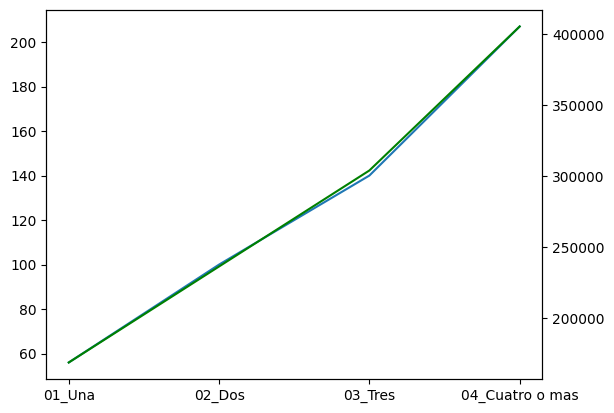

In [17]:
f, ax = plt.subplots()
ax.plot(minicubo_precio.loc['bedrooms_disc'].precio_total)
ax2 = ax.twinx()
ax2.plot(minicubo_precio.loc['bedrooms_disc'].precio_compra,color = 'green');

En cuanto al número de habitaciones no hay nada que destacar.

Existe una relación casi perfecta entre el precio de compra y el precio total que se puede cobrar.

Parte de este efecto puede ser artificial, ya que usamos el número de habitaciones para calcular el precio total como el precio de compra.

In [18]:
minicubo_precio.loc['beds_disc']

,precio_total,precio_compra
value,,
1,59.0,168945.0
2,101.0,236523.0
3-24,140.0,257355.0


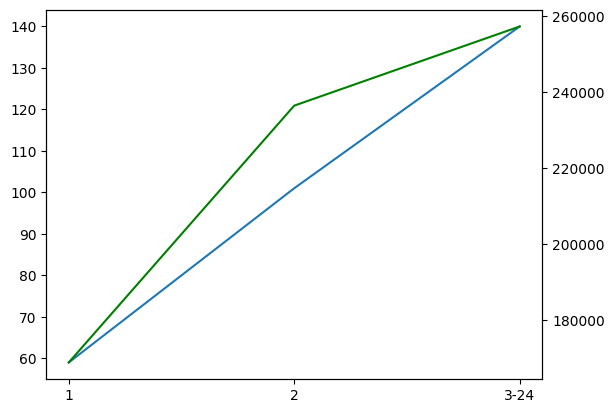

In [19]:
f, ax = plt.subplots()
ax.plot(minicubo_precio.loc['beds_disc'].precio_total)
ax2 = ax.twinx()
ax2.plot(minicubo_precio.loc['beds_disc'].precio_compra,color = 'green');

En cuanto al número de camas sí hay una conclusión:

**Insight 3: el número de camas a evitar es 2**. O bien ponemos una cama o intentamos meter todas las posibles.

Dado que no había este efecto en el número de habitaciones ¿podría ser que los propietarios estén intentando meter muchas más camas que habitaciones para maximizar el ingreso?

Veámoslo por ejemplo con los pisos de una habitación:

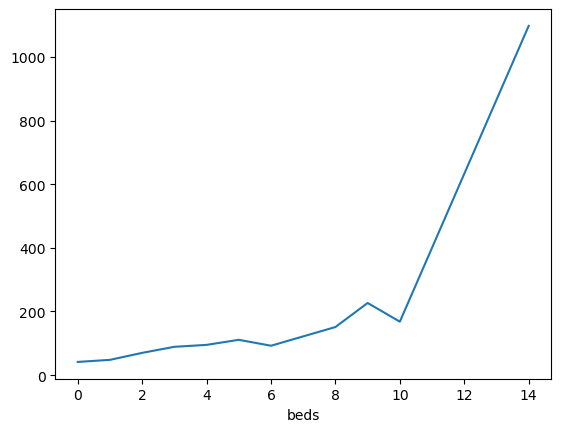

In [24]:
df[df.bedrooms == 1].groupby('beds').precio_total.median().plot();

Claramente podemos ver que algo pasa, ya que figura que para pisos de una habitación hay gente que está metiendo hasta decenas de camas!

Sería un tema a explorar con más detalle y comentar con alguien que conozca el negocio.

Vamos a ver unos ejemplos:

In [20]:
df.loc[(df.bedrooms == 1)& (df.beds > 8)]

,level_0,index,id,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,calculated_host_listings_count,availability_365,description,host_is_superhost,accommodates,bedrooms,beds,number_of_reviews,review_scores_rating,review_scores_communication,review_scores_location,precio_m2,distrito,precio_total,ocupacion,bedrooms_disc,accommodates_disc,beds_disc,number_of_reviews_disc,m2,precio_compra,pdi_sol
342,342,342,1044902,Masía el Ferrajón,5751753,Moncloa - Aravaca,Ciudad Universitaria,40.46549,-3.75115,Private room,112,2,1,0,<b>The space</b><br />Masía el Ferrajón featur...,f,16,1.0,14.0,0,NaN,NaN,NaN,4033,Moncloa - Aravaca,1097.6,100,01_Una,5-16,3-24,1-4,50,141155.0,6.767308
577,577,577,2143824,The Hat Madrid - 10 people shared,10940437,Centro,Sol,40.41511,-3.70804,Shared room,24,1,6,364,10 people shared room with shared bathroom. <b...,t,10,1.0,10.0,91,4.57,4.69,4.84,4827,Centro,168.0,0,01_Una,5-16,3-24,48-744,50,168945.0,0.436897
679,679,679,3011110,The Hat Madrid-Compartida 10 pers 2,10940437,Centro,Embajadores,40.41311,-3.70621,Shared room,24,1,6,364,The Hat Madrid es el primer Boutique Hostel de...,t,10,1.0,10.0,28,4.56,4.81,4.93,4827,Centro,168.0,0,01_Una,5-16,3-24,5-48,50,168945.0,0.470155
11610,11610,11610,39600798,Bed in a 10-Bed Dormitory In the Centre of Madrid,304035848,Centro,Justicia,40.42710,-3.69912,Shared room,20,1,13,351,"Low-key, hostel-style setup on a tree-lined st...",f,1,1.0,10.0,2,5.00,5.00,5.00,4827,Centro,140.0,3,01_Una,0-3,3-24,1-4,50,168945.0,1.207701
13087,13087,13087,42492960,Apartamento dúplex 10camas en literas,338384437,Tetuán,Cuatro Caminos,40.44959,-3.70138,Private room,298,1,1,364,Vivienda en planta baja con 10 plazas distribu...,f,10,1.0,10.0,1,5.00,4.00,5.00,3678,Tetuán,2086.0,0,01_Una,5-16,3-24,1-4,50,128730.0,3.658902
15423,15423,15423,48855617,"habitaciones en una casa tranquila, en el centro",194738186,Salamanca,Fuente del Berro,40.42604,-3.66373,Private room,36,2,1,359,Es una casa que tiene dos habitaciones que se ...,f,5,1.0,9.0,0,NaN,NaN,NaN,6114,Salamanca,226.8,1,01_Una,5-16,3-24,1-4,50,213990.0,3.510206


Vamos a analizar ahora por el número de huéspedes que aceptan

In [21]:
minicubo_precio.loc['accommodates_disc']

,precio_total,precio_compra
value,,
0-3,50.0,168945.0
4,86.0,168945.0
5-16,127.0,236523.0


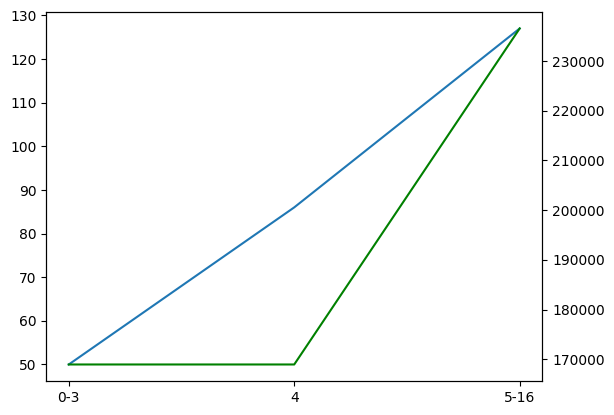

In [23]:
f, ax = plt.subplots()
ax.plot(minicubo_precio.loc['accommodates_disc'].precio_total)
ax2 = ax.twinx()
ax2.plot(minicubo_precio.loc['accommodates_disc'].precio_compra,color = 'green');

**Insight 4: el número óptimo de huéspedes está en 4, ya el precio de los inmuebles para acomodar 4 es el mismo que para acomodar 0 a 3. A partir de 5 el piso necesita ser mayor y el precio de compra se incrementa bastante**

Por último vamos a analizar la variable que hemos construído de cercanía a un punto de interés para ver si tiene efecto sobre el precio de las habitaciones.

En una situación real hubiéramos construído muchas de este tipo, y repetido el análisis con todas.

En este caso como hemos construído la distancia a la Puerta del Sol vamos a evaluar solo los distritos para lo que esto puede ser relevante, es decir los más céntricos.

Para ello primero vamos a calcular la distancia media por distrito y elegir un punto de corte.

In [24]:
df.groupby('distrito').pdi_sol.median().sort_values()

distrito
Centro                    0.727512
Arganzuela                1.818659
Chamberí                  2.075393
Moncloa - Aravaca         2.105601
Retiro                    2.414754
Salamanca                 2.711892
Latina                    3.484133
Carabanchel               3.651529
Usera                     3.663386
Puente de Vallecas        4.232987
Chamartín                 4.250345
Tetuán                    4.570448
Ciudad Lineal             5.177483
Moratalaz                 5.242976
Villaverde                7.579665
Fuencarral - El Pardo     7.728758
San Blas - Canillejas     7.966706
Hortaleza                 8.133414
Vicálvaro                 8.422376
Villa de Vallecas         8.822907
Barajas                  11.594355
Name: pdi_sol, dtype: float64

Vamos a cortar en Latina incluído.

In [25]:
df.groupby('distrito').pdi_sol.median().sort_values()[0:7].index.to_list()

['Centro',
 'Arganzuela',
 'Chamberí',
 'Moncloa - Aravaca',
 'Retiro',
 'Salamanca',
 'Latina']

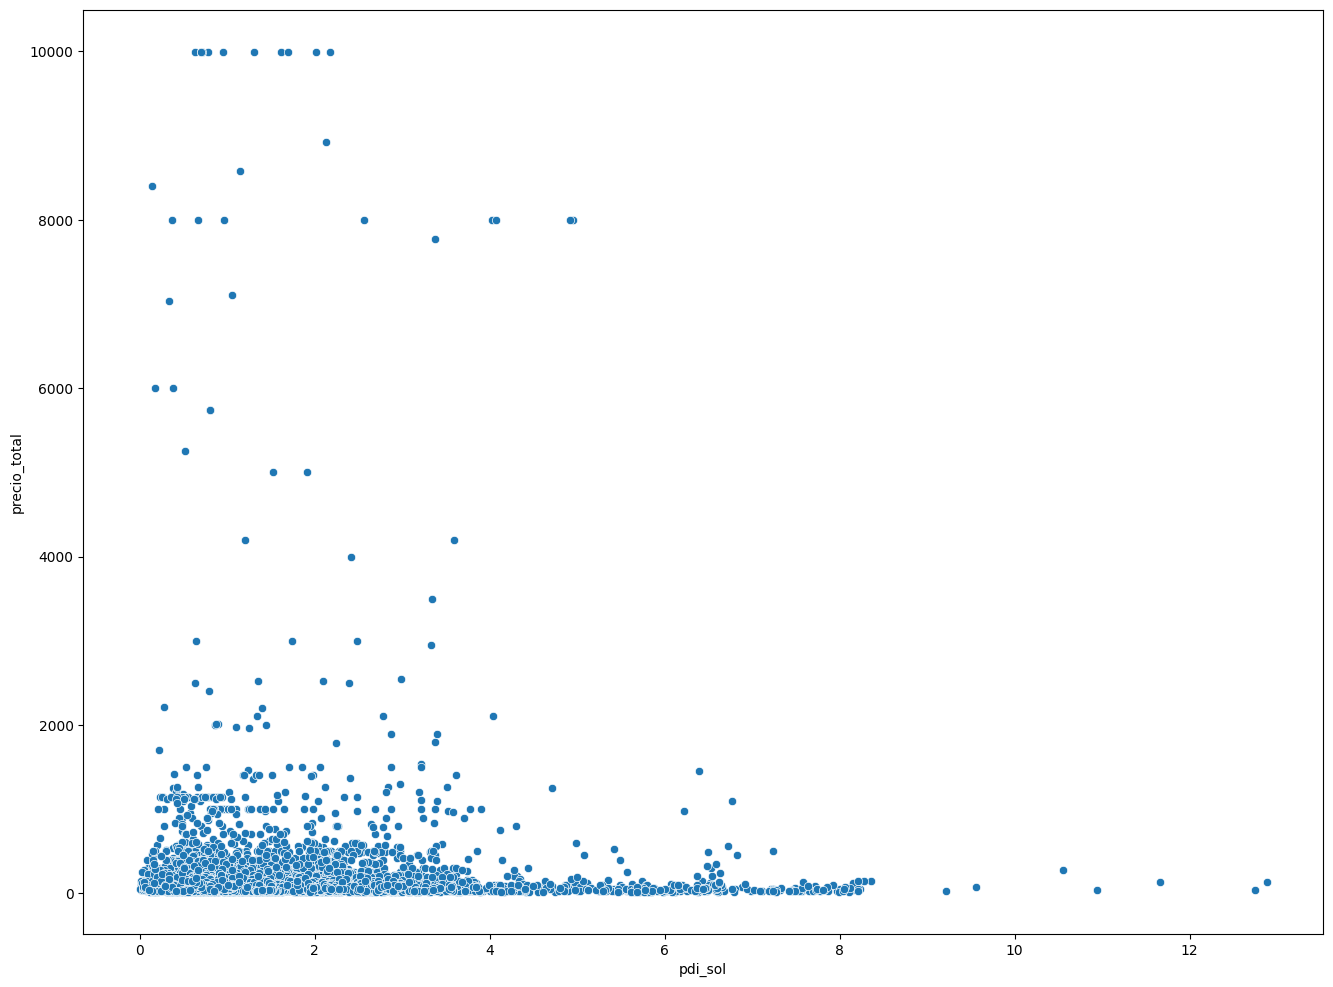

In [26]:
seleccion = df.groupby('distrito').pdi_sol.median().sort_values()[0:7].index.to_list()

plt.figure(figsize = (16,12))
sns.scatterplot(data = df.loc[df.distrito.isin(seleccion)], x = 'pdi_sol', y = 'precio_total');

No parece haber una relación tan directa como sería esperable entre la distancia a la Puerta del Sol y el precio de alquiler.

**Insight 5: estando dentro del distrito parece que la cercanía a puntos de interés no tiene tanto impacto como sería esperable. Eso abre la puerta a buscar inmuebles que estando en un distrito céntrico no estén justo al lado del Punto de Interés y por tanto esperablmente tengan un precio de compra menor**

### Analisis sobre la ocupación

**¿Cual es la ocupación media? ¿Y por distritos?¿Y por barrios?**

**¿Cómo de probable es cada nivel de ocupación en cada distrito?**

In [27]:
df.ocupacion.describe()

count    17367.000000
mean        57.200092
std         38.431599
min          0.000000
25%         14.000000
50%         67.000000
75%        100.000000
max        100.000000
Name: ocupacion, dtype: float64

No vemos ningún valor atípico ni fuera de lo normal, recordar que esta variable es un porcentaje. Por lo tanto podremos usar la media como medida de centralización.

In [28]:
df.groupby('distrito').ocupacion.mean().sort_values(ascending = False)

distrito
Arganzuela               64.231313
Barajas                  59.872340
Chamberí                 59.820416
Salamanca                59.733891
Moratalaz                58.956989
Moncloa - Aravaca        58.560924
Retiro                   58.535537
Ciudad Lineal            58.410405
Centro                   57.310941
Chamartín                57.199616
Tetuán                   56.974531
Latina                   56.228311
Fuencarral - El Pardo    55.933852
Carabanchel              54.105719
Hortaleza                53.410256
Villaverde               51.193798
Usera                    50.565217
San Blas - Canillejas    50.388646
Villa de Vallecas        49.344444
Vicálvaro                45.910714
Puente de Vallecas       45.246725
Name: ocupacion, dtype: float64

En este caso no vemos ningún valor extraño, están dentro de un rango razonable de porcentajes de ocupación.

In [31]:
temp = df.groupby('distrito')[['ocupacion','precio_compra']].mean()
temp

,ocupacion,precio_compra
distrito,,
Arganzuela,64.231313,165417.742424
Barajas,59.872340,134208.219858
Carabanchel,54.105719,85328.410745
Centro,57.310941,199079.418348
Chamartín,57.199616,212061.143954
Chamberí,59.820416,223189.435728
Ciudad Lineal,58.410405,117968.208092
Fuencarral - El Pardo,55.933852,155201.058366
Hortaleza,53.410256,159957.219373


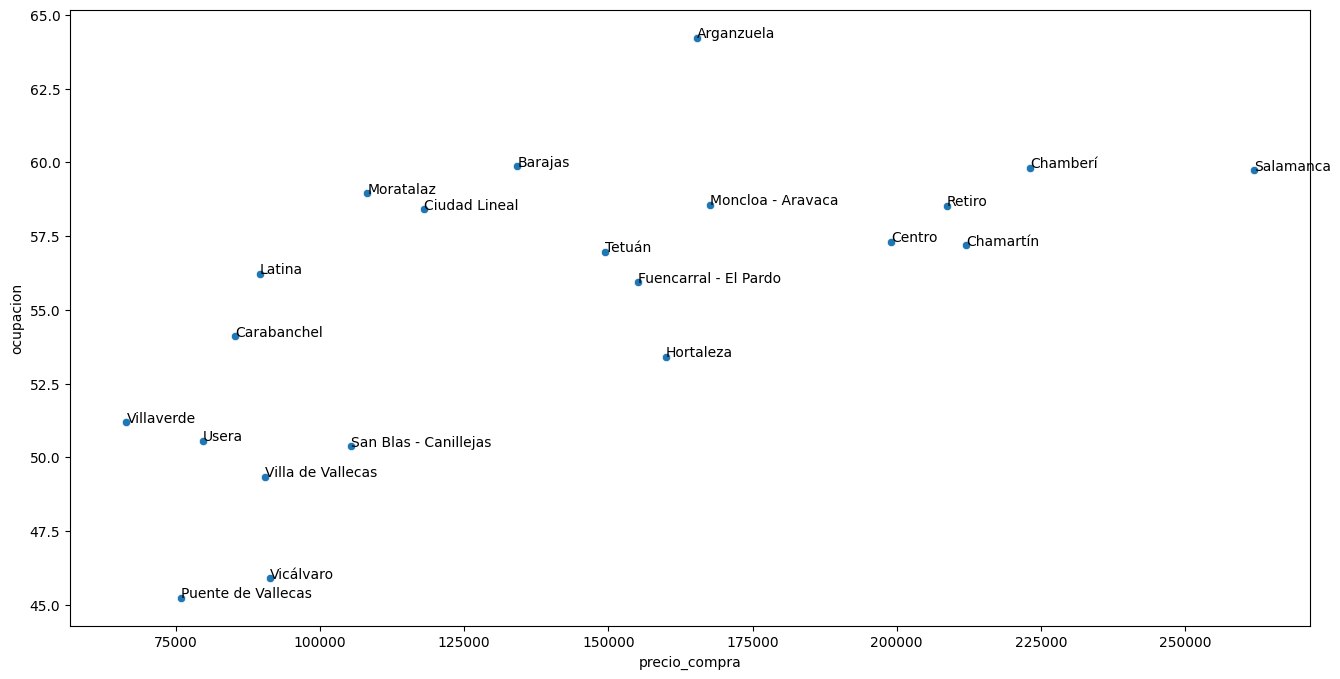

In [35]:
plt.figure(figsize = (16,8))
sns.scatterplot(data = temp, x = 'precio_compra', y = 'ocupacion')
#Ponemos las etiquetas
for cada in range(0,temp.shape[0]):
    plt.text(temp.precio_compra.iloc[cada], temp.ocupacion.iloc[cada], temp.index[cada])

Al comparar la ocupación con el precio de compra del inmueble vemos que hay algún tipo de relación o tendencia. 

**Insight 6: los inmuebles tienden a tener un mayor porcentaje de ocupación cuanto mayor es el precio de compra del mismo. Esta relación es especialmente fuerte en los tramos de los inmuebles más baratos hasta los de nivel medio o medio-alto, dado que luego la curva parece tener menor pendiente.**

<Figure size 1600x800 with 0 Axes>

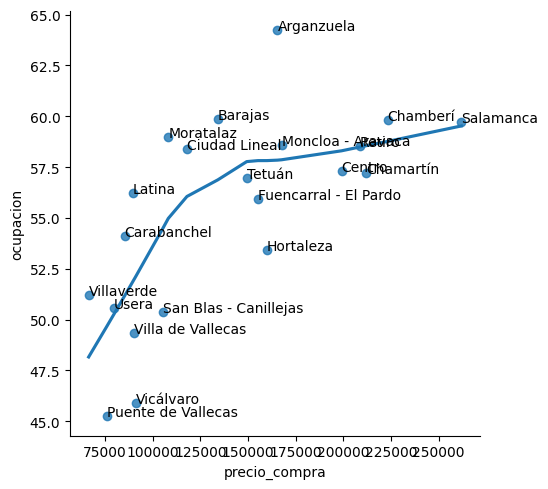

In [33]:
plt.figure(figsize = (16,8))
sns.lmplot(data = temp, x = 'precio_compra', y = 'ocupacion', lowess = True)
#Ponemos las etiquetas
for cada in range(0,temp.shape[0]):
    plt.text(temp.precio_compra.iloc[cada], temp.ocupacion.iloc[cada], temp.index[cada])

Ahora veamos si logramos ir incluso más al detalle analizando por barrio.

In [36]:
df.groupby('neighbourhood').ocupacion.mean().sort_values(ascending = False)

neighbourhood
Atalaya            100.000000
Valdemarín          81.750000
Corralejos          75.363636
Pavones             75.200000
Acacias             75.054422
                      ...    
Portazgo            35.560000
Palomeras Bajas     35.298246
Hellín              34.588235
Ambroz              33.500000
Fuentelareina       20.750000
Name: ocupacion, Length: 128, dtype: float64

Ya a simple vista nos llama la atención el dato del barrio "Atalaya" que tiene 100% de ocupación, luego lo seguiremos analizando.

In [40]:
temp = df.groupby('neighbourhood')[['ocupacion', 'precio_compra']].mean()
temp

,ocupacion,precio_compra
neighbourhood,,
Abrantes,45.647059,80424.235294
Acacias,75.054422,158536.904762
Adelfas,52.653061,216486.000000
Aeropuerto,46.750000,127269.333333
Aguilas,49.414634,87085.975610
...,...,...
Valverde,53.178571,148666.666667
Ventas,66.594203,114532.173913
Vinateros,56.714286,108750.000000


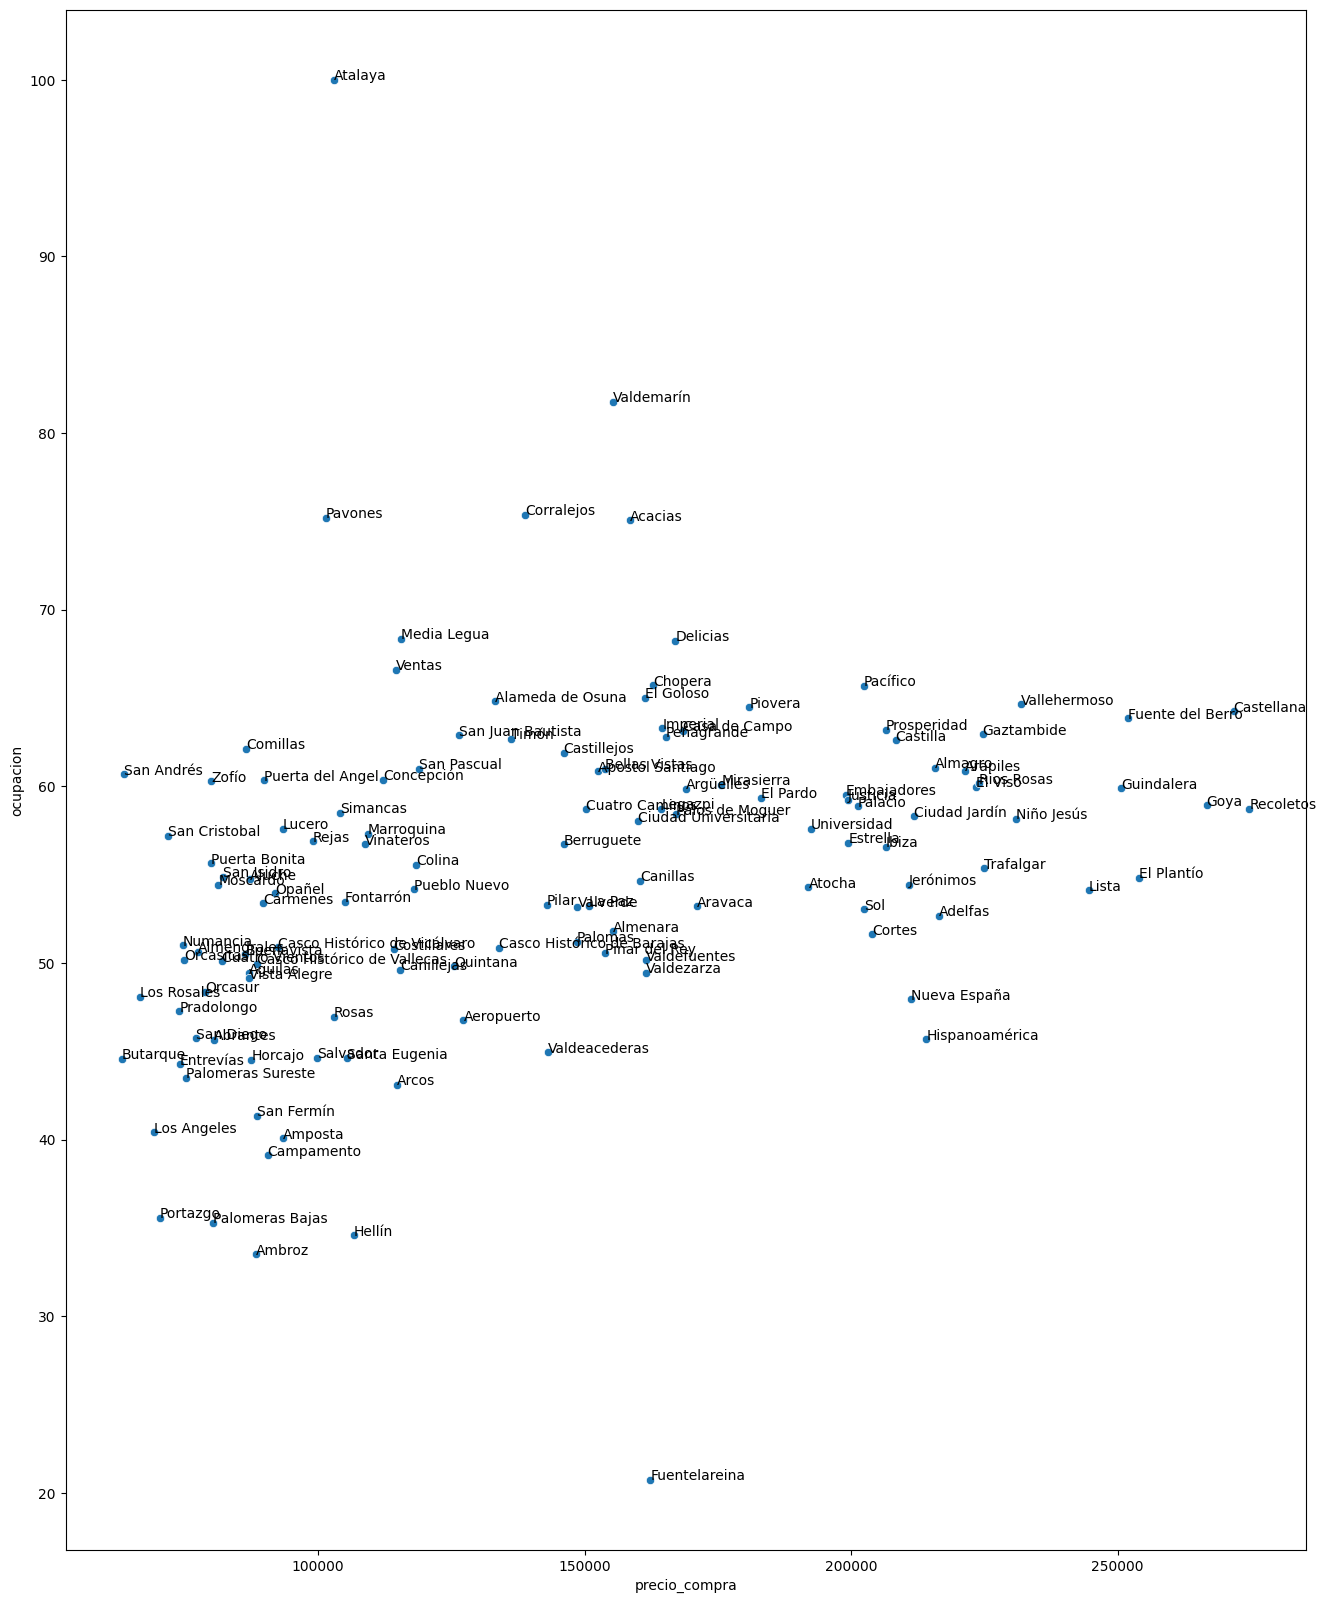

In [41]:
plt.figure(figsize = (16,20))
sns.scatterplot(data = temp, x = 'precio_compra', y = 'ocupacion')
#Ponemos las etiquetas
for cada in range(0,temp.shape[0]):
    plt.text(temp.precio_compra.iloc[cada], temp.ocupacion.iloc[cada], temp.index[cada])

In [45]:
df.loc[df.neighbourhood.isin(temp.loc[temp.ocupacion > 70].index), 'neighbourhood_group'].value_counts()

neighbourhood_group
Arganzuela           147
Barajas               11
Moratalaz              5
Moncloa - Aravaca      4
Ciudad Lineal          1
Name: count, dtype: int64

A nivel de barrio hay una tendencia bastante similar a la del nivel de distritos.

Ahora entendemos por qué vimos previamente al distrito de Arganzuela como el que mayor ocupación tenía, estando separado del grupo que compartían valores muy similares. Aparentemente la mayoría de las publicaciones con ocupación mayor al 70% pertenecen a ese lugar. Esto puede ser porque habíamos visto que era el distrito del sector medio-medio que menor renta media cobraba, por lo que puede parecer atractivo para los turistas.

De todas formas no vamos a indagar mucho en Arganzuela porque el objetivo apuntaba a obtener mayores márgenes de rentabilidad, y este distrito tiene márgenes bajos.

Repetimos el análisis pero con la cruza de ocupación y el precio de alquiler.

In [46]:
temp = df.groupby('distrito').agg({'ocupacion':'mean','precio_total':'median'})
temp

,ocupacion,precio_total
distrito,,
Arganzuela,64.231313,58.0
Barajas,59.872340,50.0
Carabanchel,54.105719,48.0
Centro,57.310941,77.0
Chamartín,57.199616,74.2
Chamberí,59.820416,70.0
Ciudad Lineal,58.410405,50.0
Fuencarral - El Pardo,55.933852,60.9
Hortaleza,53.410256,70.0


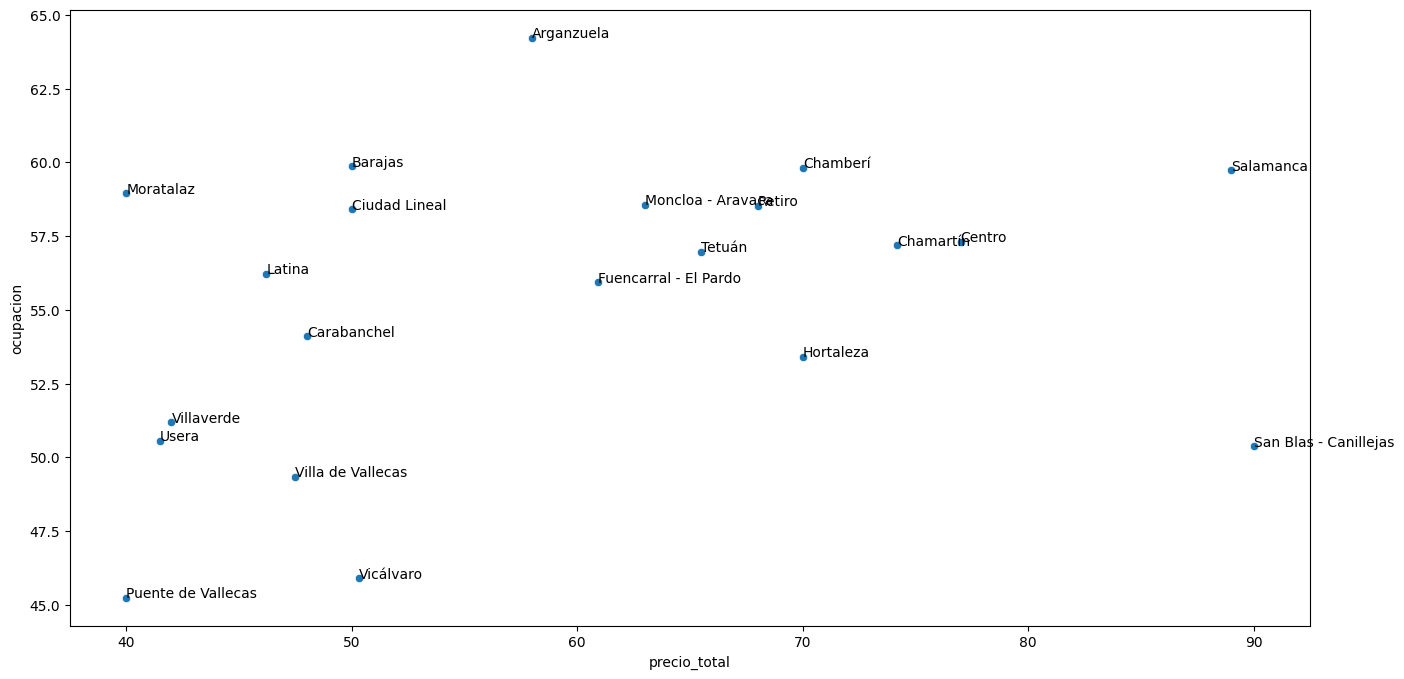

In [47]:
plt.figure(figsize = (16,8))
sns.scatterplot(data = temp, x = 'precio_total', y = 'ocupacion')
#Ponemos las etiquetas
for cada in range(0,temp.shape[0]):
    plt.text(temp.precio_total.iloc[cada], temp.ocupacion.iloc[cada], temp.index[cada])

En este caso no hay relación clara, pasamos a la analizar por barrio.

In [48]:
temp = df.groupby('neighbourhood').agg({'ocupacion':'mean','precio_total':'median'})
temp

,ocupacion,precio_total
neighbourhood,,
Abrantes,45.647059,35.5
Acacias,75.054422,54.6
Adelfas,52.653061,54.0
Aeropuerto,46.750000,41.3
Aguilas,49.414634,47.0
...,...,...
Valverde,53.178571,62.5
Ventas,66.594203,42.0
Vinateros,56.714286,50.0


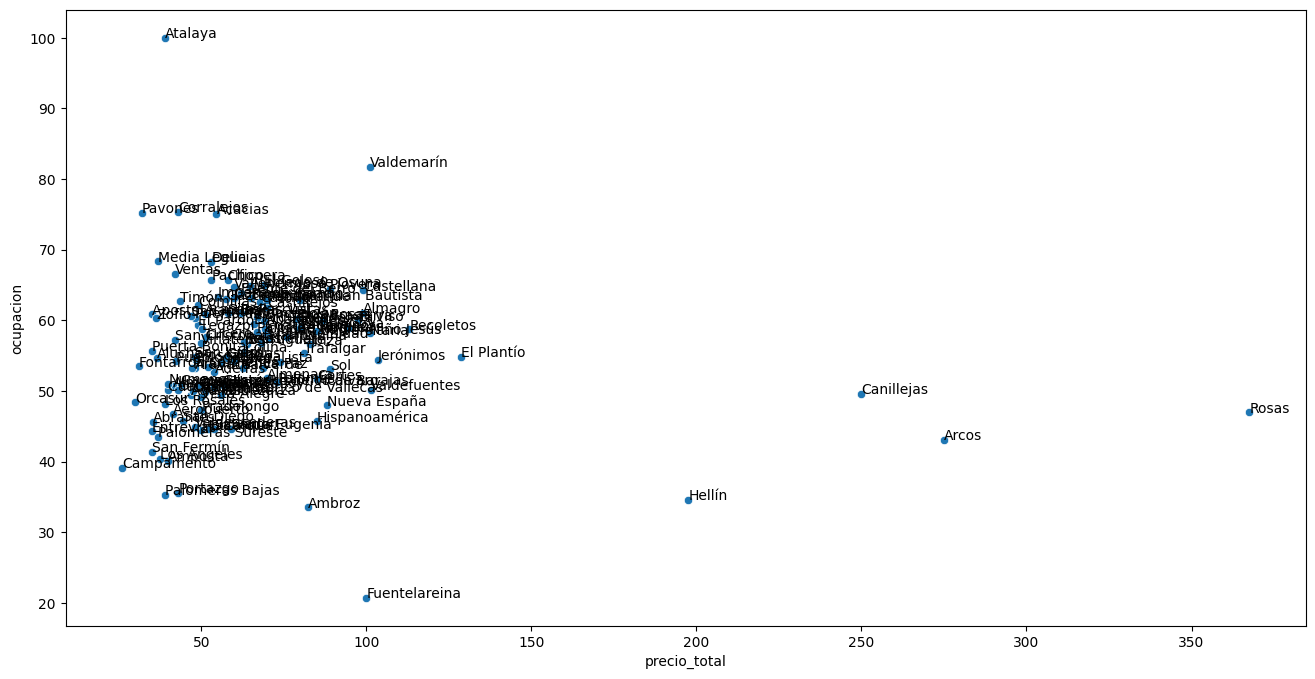

In [58]:
plt.figure(figsize = (16,8))
sns.scatterplot(data = temp, x = 'precio_total', y = 'ocupacion')
#Ponemos las etiquetas
for cada in range(0,temp.shape[0]):
    plt.text(temp.precio_total.iloc[cada], temp.ocupacion.iloc[cada], temp.index[cada]);

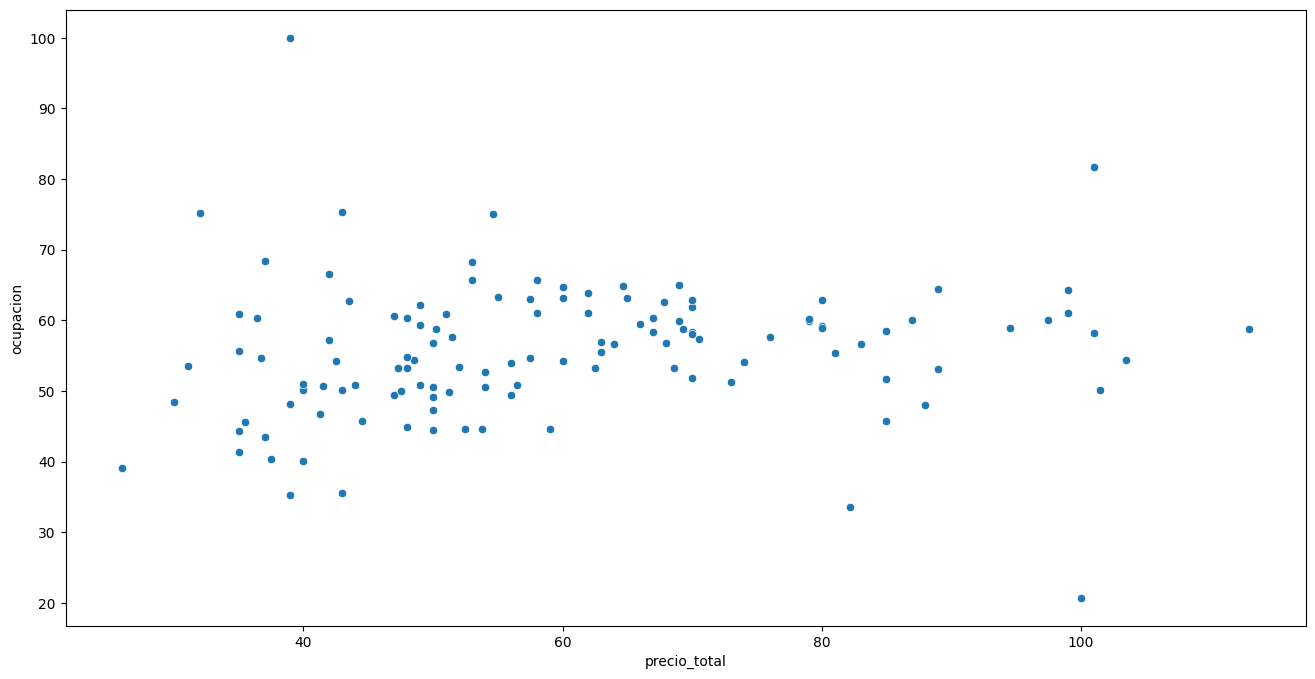

In [60]:
plt.figure(figsize = (16,8))
sns.scatterplot(data = temp.loc[temp.precio_total < 120], x = 'precio_total', y = 'ocupacion');

No logramos distinguir ningún patrón o tendencia en este caso.

**¿Qué factores (a parte de la localización) determinan la ocupación?**

Volvemos a hacer uso del minicubo

In [65]:
#Paso 1: Seleccionar qué variables serán la métricas y cuales las dimensiones
metricas = ['ocupacion','precio_total']
dimensiones = ['bedrooms_disc','accommodates_disc','beds_disc','number_of_reviews_disc']

minicubo_precio = df[dimensiones + metricas]
minicubo_precio

,bedrooms_disc,accommodates_disc,beds_disc,number_of_reviews_disc,ocupacion,precio_total
0,01_Una,0-3,1,48-744,50,60.0
1,01_Una,0-3,1,5-48,0,31.0
2,03_Tres,5-16,3-24,1-4,39,50.0
3,01_Una,0-3,1,5-48,68,92.0
4,01_Una,0-3,1,48-744,4,26.0
...,...,...,...,...,...,...
17362,01_Una,0-3,1,1-4,1,29.0
17363,01_Una,0-3,1,1-4,1,29.0
17364,01_Una,0-3,1,1-4,1,29.0
17365,01_Una,0-3,1,1-4,1,29.0


In [66]:
#Paso 2: pasar a transaccional las dimensiones
minicubo_precio = minicubo_precio.melt(id_vars=metricas)
minicubo_precio

,ocupacion,precio_total,variable,value
0,50,60.0,bedrooms_disc,01_Una
1,0,31.0,bedrooms_disc,01_Una
2,39,50.0,bedrooms_disc,03_Tres
3,68,92.0,bedrooms_disc,01_Una
4,4,26.0,bedrooms_disc,01_Una
...,...,...,...,...
69463,1,29.0,number_of_reviews_disc,1-4
69464,1,29.0,number_of_reviews_disc,1-4
69465,1,29.0,number_of_reviews_disc,1-4
69466,1,29.0,number_of_reviews_disc,1-4


In [69]:
#Paso 3: Agregar las métricas por "variable" y "valor" con las funciones deseadas
minicubo_precio = minicubo_precio.groupby(['variable','value']).agg({'ocupacion':'mean','precio_total':'median'})
minicubo_precio

ocupacion  precio_total
variable               value                                   
accommodates_disc      0-3              58.711760          50.0
                       4                55.863659          86.0
                       5-16             53.913799         127.0
bedrooms_disc          01_Una           57.491254          56.0
                       02_Dos           56.747113         100.0
                       03_Tres          56.937086         140.0
                       04_Cuatro o mas  53.443155         207.0
beds_disc              1                58.189228          59.0
                       2                55.886271         101.0
                       3-24             52.239547         140.0
number_of_reviews_disc 1-4              57.572616          71.0
                       48-744           56.003177          67.1
                       5-48             57.360491          69.0

Ahora pasamos a analizar las variables

In [78]:
minicubo_precio.loc['bedrooms_disc']

,ocupacion,precio_total
value,,
01_Una,57.491254,56.0
02_Dos,56.747113,100.0
03_Tres,56.937086,140.0
04_Cuatro o mas,53.443155,207.0


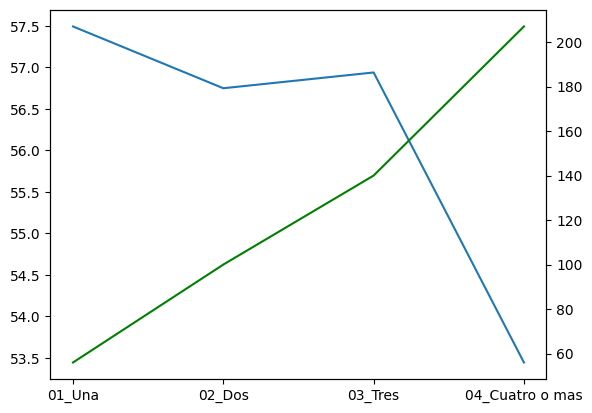

In [79]:
f, ax = plt.subplots()
ax.plot(minicubo_precio.loc['bedrooms_disc'].ocupacion)
ax2 = ax.twinx()
ax2.plot(minicubo_precio.loc['bedrooms_disc'].precio_total,color = 'green');

Podemos observar que cuantas más habitaciones mejor, ya que aumenta el precio de la renta muy rápidamente mientras que la variación en la ocupación es muy leve. En inmuebles de 4 o más habitaciones la ocupación cae muy rápidamente, por lo que habría que analizar caso a caso si será conveniente una compra de este estilo.

**Insight 7: idealmente buscar inmuebles con 3 habitaciones, ya que consiguen (en promedio) la máxima combinación de ocupación y valor de alquiler**

In [80]:
minicubo_precio.loc['accommodates_disc']

,ocupacion,precio_total
value,,
0-3,58.711760,50.0
4,55.863659,86.0
5-16,53.913799,127.0


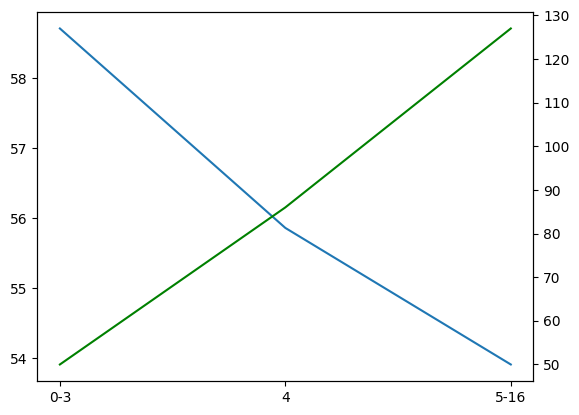

In [81]:
f, ax = plt.subplots()
ax.plot(minicubo_precio.loc['accommodates_disc'].ocupacion)
ax2 = ax.twinx()
ax2.plot(minicubo_precio.loc['accommodates_disc'].precio_total,color = 'green');

En este caso no hay mucha información para sacar, ya que están inversamente correlacionados de forma casi perfecta

In [82]:
minicubo_precio.loc['beds_disc']

,ocupacion,precio_total
value,,
1,58.189228,59.0
2,55.886271,101.0
3-24,52.239547,140.0


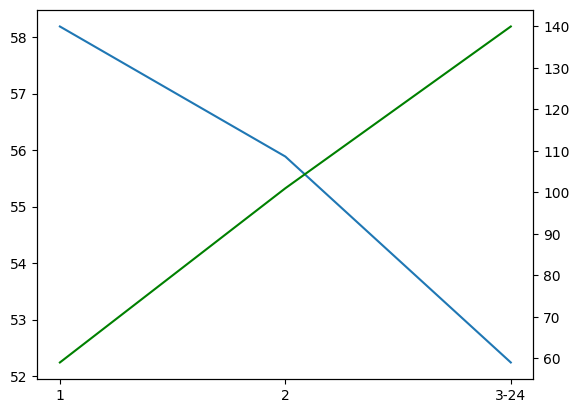

In [83]:
f, ax = plt.subplots()
ax.plot(minicubo_precio.loc['beds_disc'].ocupacion)
ax2 = ax.twinx()
ax2.plot(minicubo_precio.loc['beds_disc'].precio_total,color = 'green');

Llegamos a la misma conclusión que en el caso anterior

La última variable de number_of_reviews_disc no es muy relevante por lo que no la vamos a analizar.

Luego de la observación de estos tres últimos gráficos concluimos que **a mayor espacio, capacidad para acomodar gente y cantidad de camas, se obtiene, de media, un mayor valorde la renta del inmueble pero también una menor ocupación.**

### Análisis geográfico sobre un mapa

Para el caso de este pequeño análisis geográfico vamos a utilizar el paquete Folium, lo único que necesitamos para su uso es tener las coordenadas geográficas.

In [84]:
import folium

Vamos a analizar el dato que vimos previamente sobre el distrito de San Blas

Primero vamos a crear un rango de precios para que se note visualmente en el mapa

In [86]:
datos = df[df.distrito == 'San Blas - Canillejas'].copy()

In [87]:
datos['precio_total_disc'] = pd.qcut(datos['precio_total'], q = [0, .25, .5, .75, 1.], 
                              labels=['yellow', 'orange', 'blue', 'red'])

In [88]:
mapa = folium.Map(location=[40.4167278, -3.7033387],zoom_start=12)

for piso in range(0,len(datos)):
   folium.CircleMarker(
      location = [datos.iloc[piso]['latitude'], datos.iloc[piso]['longitude']],
      popup = datos.iloc[piso]['precio_total'],
      fill=True,
      color = datos.iloc[piso]['precio_total_disc'],
      fill_opacity=1,
      radius = 5
   ).add_to(mapa)

mapa

**Insight 8: Existen todavía muchos puntos amarillos y naranjas, lo cual puede indicar que todavía existe potencial para explotar más el factor de los eventos deportivos**